In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])  # Load only the passenger count column

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df.values)

# Create sequences for time-series forecasting
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

# Split data into training and testing
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (107, 10, 1) (107, 1)
Testing shape: (27, 10, 1) (27, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.1426 - val_loss: 0.3689
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0903 - val_loss: 0.2141
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0492 - val_loss: 0.0994
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0159 - val_loss: 0.0324
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 - val_loss: 0.0197
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0068 - val_loss: 0.0186
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - val_loss: 0.0166
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0155
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0046 - val_loss: 0.0148
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - val_loss: 0.0140
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - val_loss: 0.0133
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - val_loss: 0.0130
E

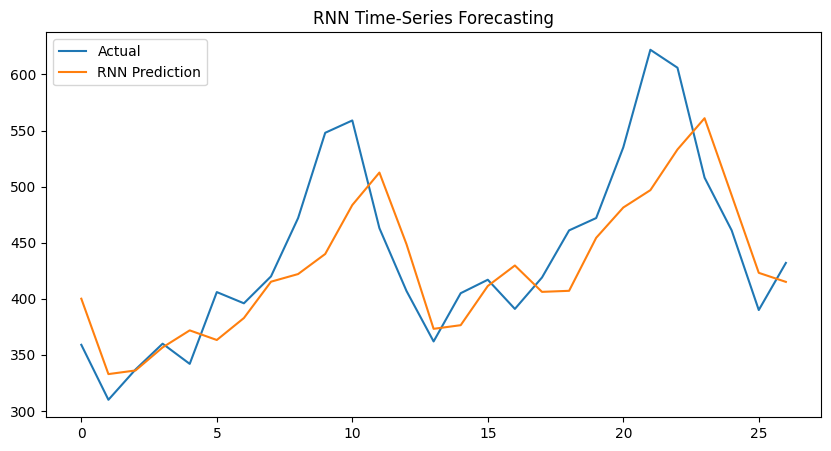

In [ ]:
# Define RNN model
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile and train
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn = scaler.inverse_transform(y_pred_rnn)  # Convert back to original scale
y_test_actual = scaler.inverse_transform(y_test)   # Convert actual values back

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual")
plt.plot(y_pred_rnn, label="RNN Prediction")
plt.legend()
plt.title("RNN Time-Series Forecasting")
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0953 - val_loss: 0.2787
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0688 - val_loss: 0.1923
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0435 - val_loss: 0.1173
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0289 - val_loss: 0.0515
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - val_loss: 0.0237
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - val_loss: 0.0240
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - val_loss: 0.0276
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081 - val_loss: 0.0231
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0072 - val_loss: 0.0235
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0063 - val_loss: 0.0243
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - val_loss: 0.0268
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080 - val_loss: 0.0252
Epoch 13/20


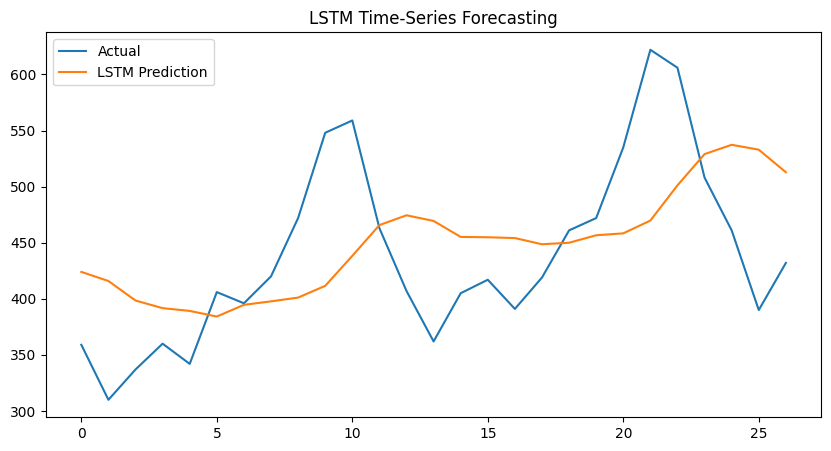

In [ ]:
# Define LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile and train
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)  # Convert back to original scale

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual")
plt.plot(y_pred_lstm, label="LSTM Prediction")
plt.legend()
plt.title("LSTM Time-Series Forecasting")
plt.show()

Training shape: (107, 10, 1) (107, 1)
Testing shape: (27, 10, 1) (27, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training RNN...

Training LSTM...


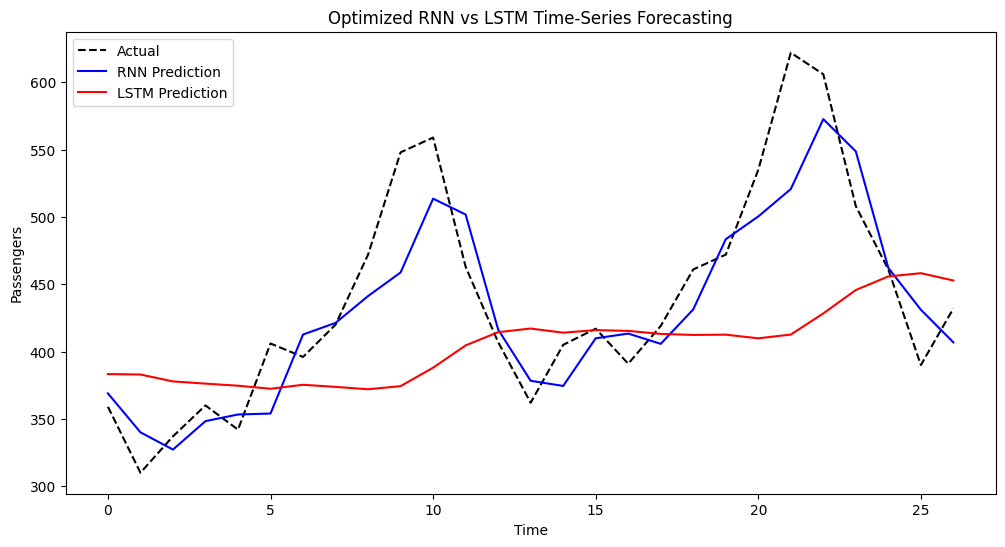

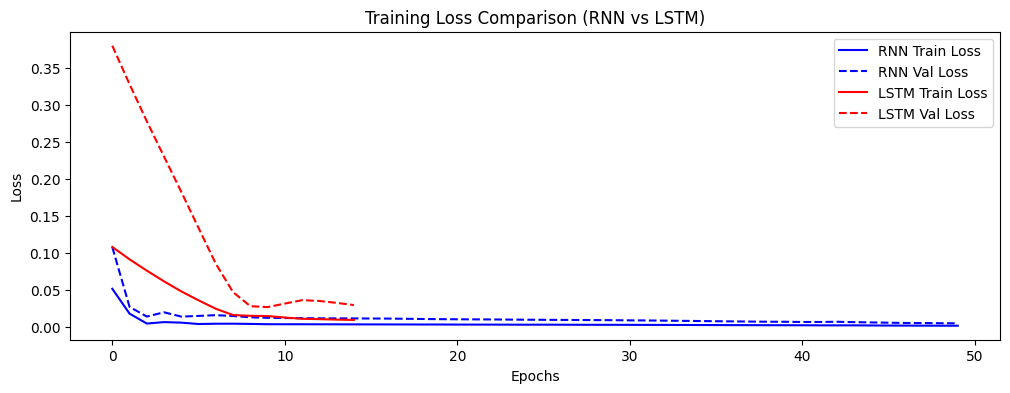

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])  # Load only the passenger count column

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df.values)

# Function to create sequences (Optimized with NumPy slicing)
def create_sequences(data, seq_length=10):
    X = np.array([data[i:i + seq_length] for i in range(len(data) - seq_length)])
    y = np.array([data[i + seq_length] for i in range(len(data) - seq_length)])
    return X, y

seq_length = 10
X, y = create_sequences(data, seq_length)

# Split data into training and testing
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

# Callbacks for faster training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Plot function for visualization
def plot_results(y_test_actual, y_pred_rnn, y_pred_lstm):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_actual, label="Actual", color='black', linestyle='dashed')
    plt.plot(y_pred_rnn, label="RNN Prediction", color='blue')
    plt.plot(y_pred_lstm, label="LSTM Prediction", color='red')
    plt.legend()
    plt.title("Optimized RNN vs LSTM Time-Series Forecasting")
    plt.xlabel("Time")
    plt.ylabel("Passengers")
    plt.show()

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                        callbacks=[early_stop, reduce_lr], verbose=0)  # Silent mode for faster execution
    y_pred = model.predict(X_test, verbose=0)  # Silent prediction
    y_pred = scaler.inverse_transform(y_pred)  # Convert back to original scale
    return model, history, y_pred

# Define RNN model (Optimized)
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')

# Define LSTM model (Optimized)
model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Train both models
model_rnn, history_rnn, y_pred_rnn = train_and_evaluate(model_rnn, "RNN")
model_lstm, history_lstm, y_pred_lstm = train_and_evaluate(model_lstm, "LSTM")

# Convert actual values back
y_test_actual = scaler.inverse_transform(y_test)

# Plot results
plot_results(y_test_actual, y_pred_rnn, y_pred_lstm)

# Plot training loss curves
plt.figure(figsize=(12, 4))
plt.plot(history_rnn.history['loss'], label='RNN Train Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss', color='blue', linestyle='dashed')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='red', linestyle='dashed')
plt.legend()
plt.title("Training Loss Comparison (RNN vs LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
